<a href="https://colab.research.google.com/github/ryanharvey1/teamA-grebes-NMA2020/blob/master/3d_plot_running_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

plt.rcParams.update({'font.size': 13})
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LinearRegression
import sys
import pandas as pd  
import numpy as np 
from scipy import stats  
from itertools import compress
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D



In [ ]:
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())   

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


In [ ]:

speed_map = np.load('/content/drive/My Drive/nma_data/6163622_v6/speed_map.npy')


df = pd.read_pickle("/content/drive/My Drive/nma_data/6163622_v6/speed_df.pkl")
df

,speed_cor,speed_cor_pvalue,slope,intercept,speed_mod,speed_mod_pvalue
0,0.037081,0.031873,[[0.04655153712639664]],[6.701278006979309],0.029077431,0.059761
1,-0.015747,0.119522,[[-0.008001666373229879]],[5.433671749085655],0.010097089,0.274900
2,-0.008763,0.454183,[[-0.0073181789721904495]],[4.6965754671733455],0.010708806,0.159363
3,0.196378,0.003984,[[0.06816048084295674]],[8.474296393925272],0.16257545,0.035857
4,0.008459,0.278884,[[0.08151148078289507]],[13.27337580967431],0.009054725,0.390438
...,...,...,...,...,...,...
11978,-0.028630,0.007968,[[-0.31601890375345476]],[86.03674125511317],0.0073964316,0.561753
11979,0.009240,0.557769,[[-0.020151207141361857]],[35.48008323940126],0.024111908,0.003984
11980,-0.031522,0.031873,[[-0.010835917051686884]],[32.71565770394717],0.017061893,0.207171
11981,-0.000512,0.968127,[[-0.16513455051549225]],[53.14822019287467],0.0088076275,0.266932


In [ ]:
dat['xyz'].shape

(3, 11983)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

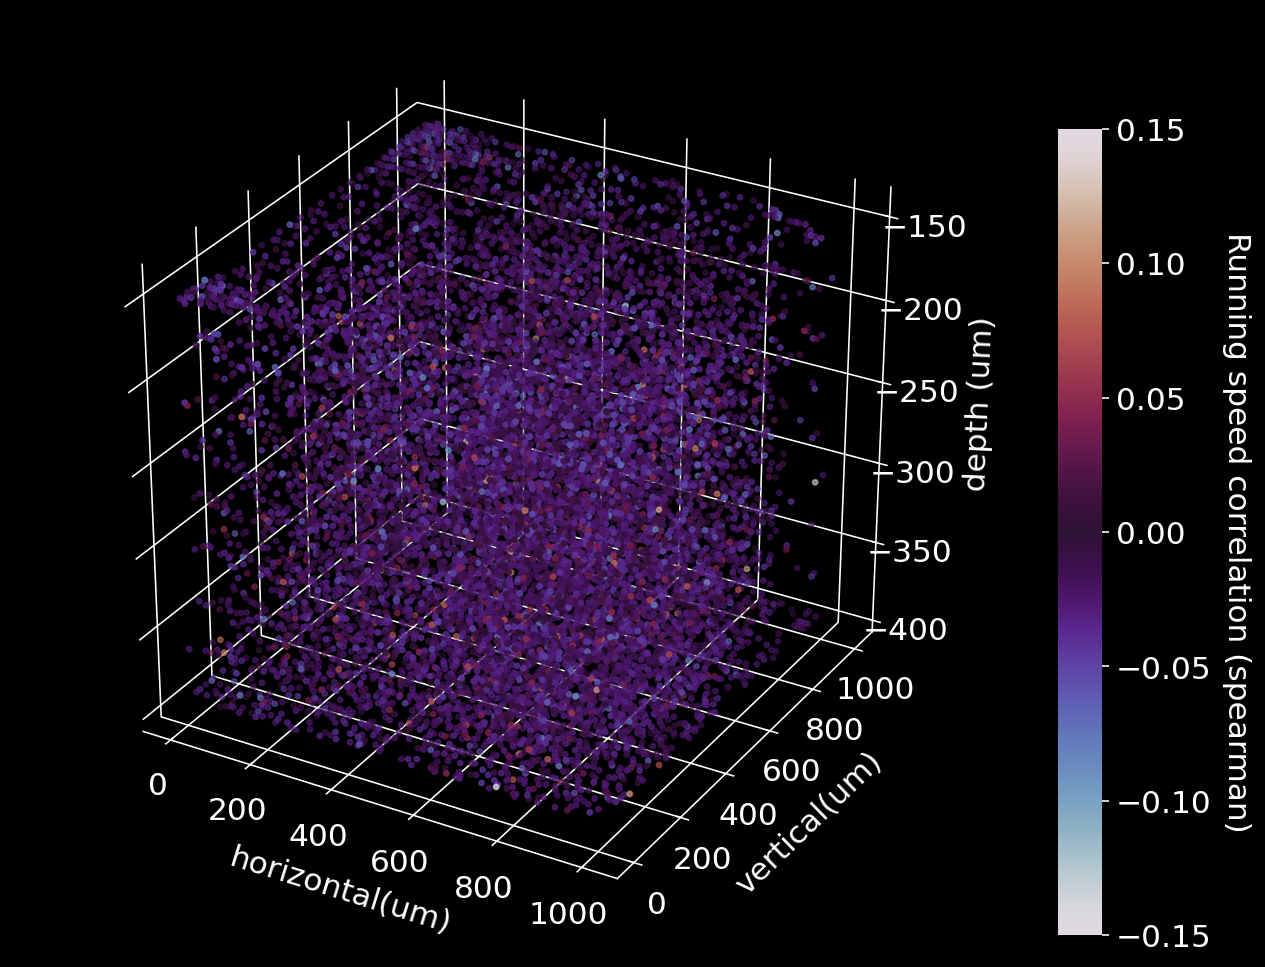

In [ ]:
# title plot the 3D positions of all neurons

x, y, z = dat['xyz']

cmap = 'twilight'

norm = mpl.colors.Normalize(vmin=-0.15,vmax=0.15)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 6, c = df.speed_cor,cmap = 'twilight')
# ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)')
ax.set_xlabel('horizontal(um)')
ax.set_ylabel('vertical(um)')
ax.set_zlabel('depth (um)')
# ax.xaxis._axinfo['label']['space_factor'] = 200
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=13

ax.w_xaxis.set_pane_color((0, 0, 0, 1.0))
ax.w_yaxis.set_pane_color((0, 0, 0, 1.0))
ax.w_zaxis.set_pane_color((0, 0, 0, 1.0))


sm = plt.cm.ScalarMappable(cmap='twilight', norm=norm)
sm.set_array([])
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.03, 0.7])
cbar = plt.colorbar(sm,cax=cax)

cbar.set_label('Running speed correlation (spearman)', rotation=270, labelpad=20)
cbar.outline.set_visible(False)

from google.colab import files
fig.savefig("scatter.png",dpi=600, bbox_inches="tight")
files.download("scatter.png")

plt.show()

In [ ]:
stack = np.flipud(np.unique(z))
print(stack)


[-150. -180. -210. -240. -270. -300. -330. -360. -390.]


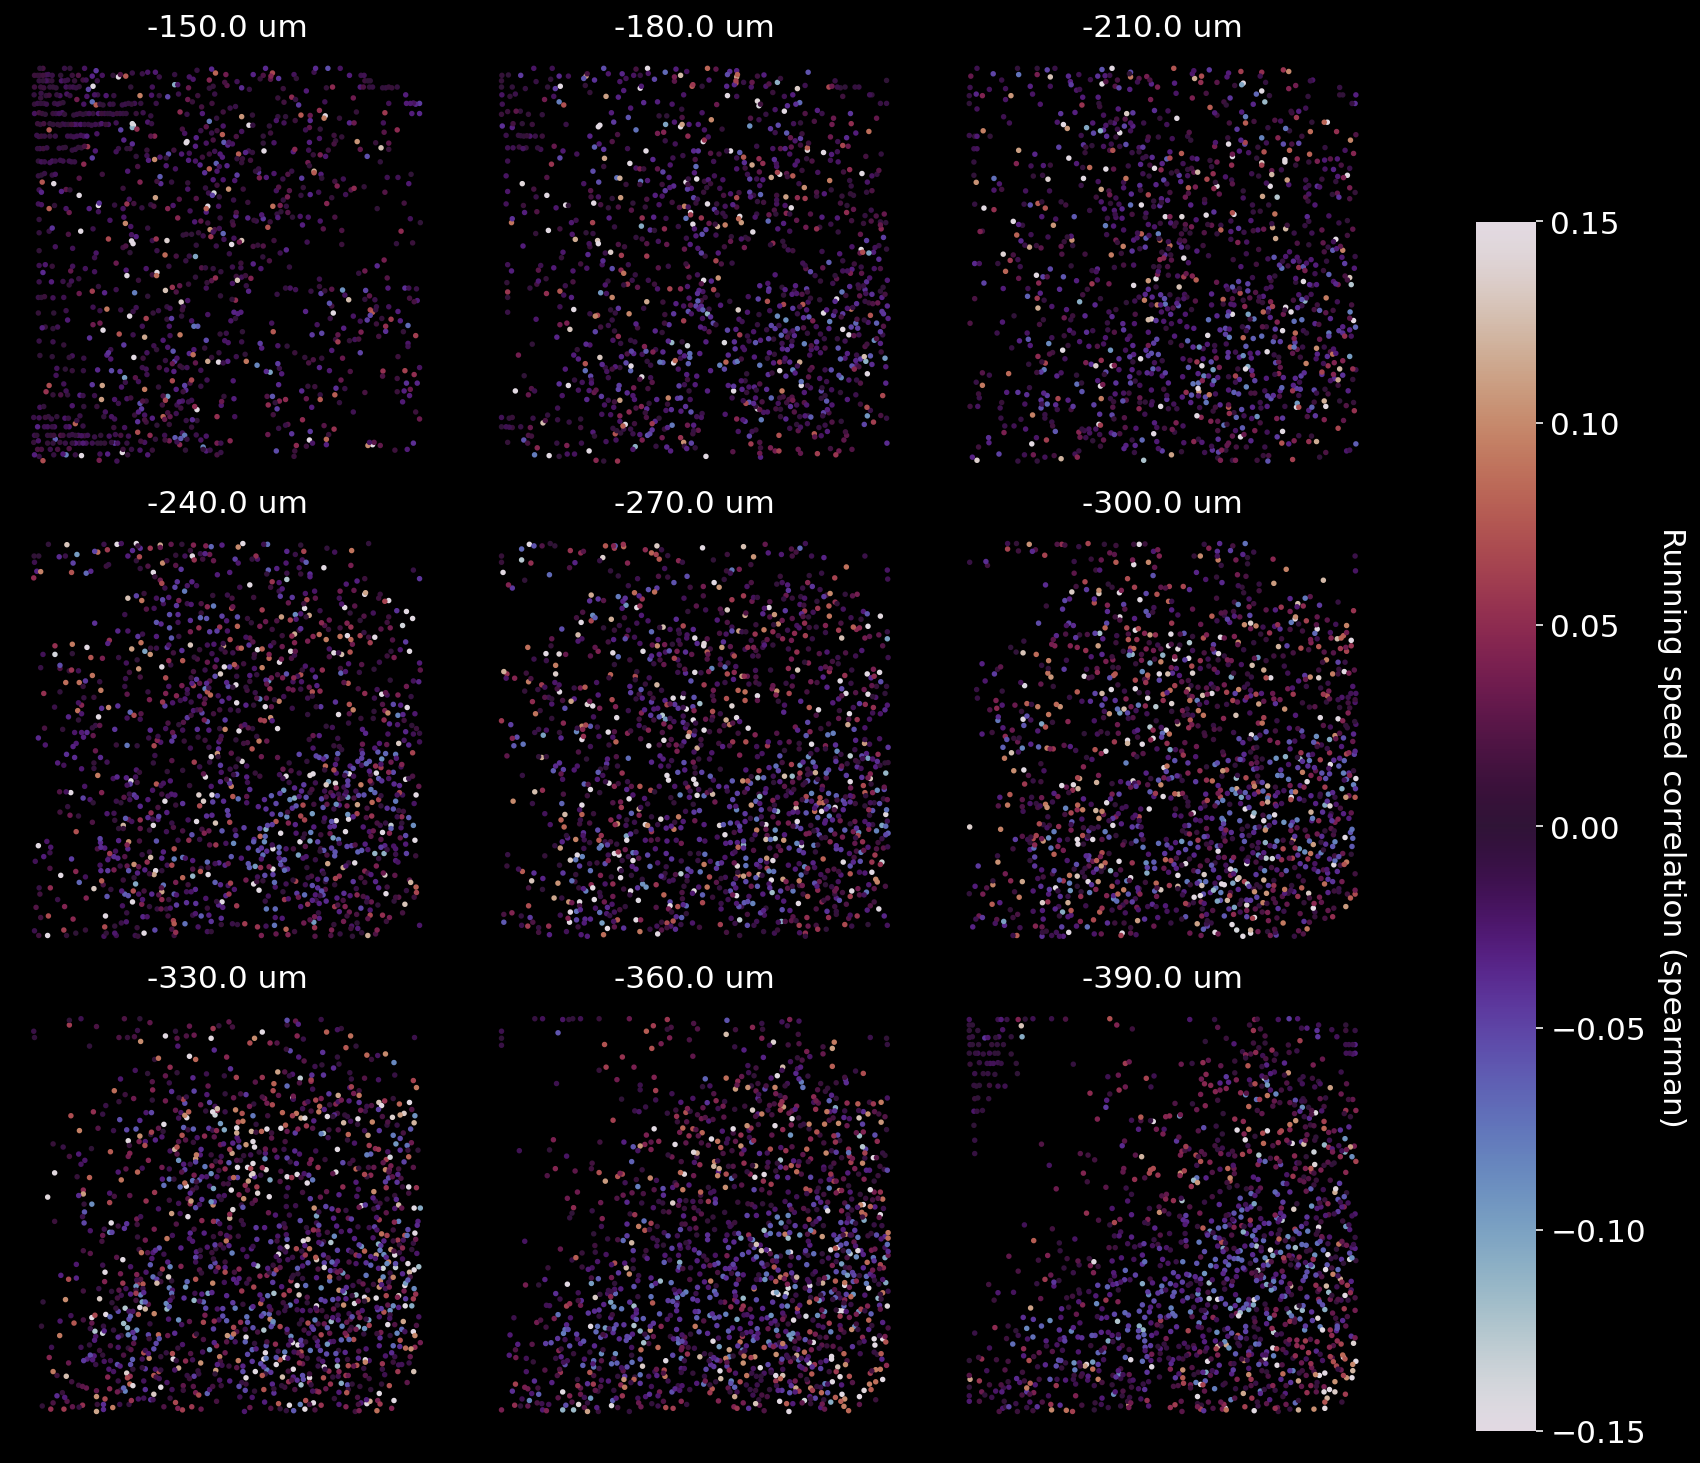

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib as mpl

fig, axs = plt.subplots(3,3, figsize=(14, 12), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.1)

axs = axs.ravel()

# mag = max(abs(df.speed_cor))
norm = mpl.colors.Normalize(vmin=-0.15,vmax=0.15)

for i,val in enumerate(stack):
  idx = z == val
  axs[i].scatter(x[idx],y[idx],c = df.speed_cor[idx],cmap='twilight',s=3,norm=norm)
  axs[i].axis('off')
  axs[i].set_title(str(val)+' um')


sm = plt.cm.ScalarMappable(cmap='twilight', norm=norm)
sm.set_array([])
# plt.colorbar(sm)

# fig.colorbar(sm, orientation="horizontal", pad=0.2)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.03, 0.7])
cbar = plt.colorbar(sm,cax=cax)

cbar.set_label('Running speed correlation (spearman)', rotation=270, labelpad=20)
cbar.outline.set_visible(False)

plt.show()

from google.colab import files
fig.savefig("scatter.png",dpi=400, bbox_inches="tight")
files.download("scatter.png")